In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sn 

In [2]:
train_data = pd.read_excel('BondPrices.xlsx')
train_data.head()


Unnamed: 0  bond_id  trade_price  current_coupon  time_to_maturity  \
0      101104     5380     104.3191           6.375          1.072349   
1      101105     5380     104.3191           6.375          1.072349   
2      101106     5380     104.3190           6.375          1.072257   
3      101107     5380     103.9280           6.375          1.072123   
4      101108     5380     103.6930           6.375          1.071774   

   is_callable  reporting_delay  trade_size  trade_type  curve_based_price  \
0            0           38.639       40000           4         104.202618   
1            0           38.844       40000           2         104.202618   
2            0          117.423        6000           2         104.364239   
3            0           30.532       10000           2         104.431633   
4            0            2.686       10000           2         104.535467   

   ...  received_time_diff_last2  trade_price_last2  trade_size_last2  \
0  ...                       NaN                NaN               NaN   
1  ...                      28.0           104.3591           40000.0   
2  ...                    2923.0           104.3191           40000.0   
3  ...                    7145.0           104.3191           40000.0   
4  ...                   15213.0           104.3190            6000.0   

   trade_type_last2  curve_based_price_last2  received_time_diff_last3  \
0               NaN                      NaN                       NaN   
1               4.0               104.202618                       NaN   
2               4.0               104.202618                    2951.0   
3               2.0               104.202618                    7145.0   
4               2.0               104.364239                   18136.0   

   trade_price_last3  trade_size_last3  trade_type_last3  \
0                NaN               NaN               NaN   
1                NaN               NaN               NaN   
2           104.3591           40000.0               4.0   
3           104.3191           40000.0               4.0   
4           104.3191           40000.0               2.0   

   curve_based_price_last3  
0                      NaN  
1                      NaN  
2               104.202618  
3               104.202618  
4               104.202618  

[5 rows x 25 columns]

In [3]:
train_data.shape

(100005, 25)

In [4]:
data_sample = train_data

In [5]:
data_sample.tail()

Unnamed: 0  bond_id  trade_price  current_coupon  time_to_maturity  \
100000      201104     8347       99.150            4.75          3.775962   
100001      201105     8347      101.312            4.75          3.762565   
100002      201106     8347      102.250            4.75          3.762313   
100003      201107     8347      105.020            4.75          3.756416   
100004      201108     8347      104.161            4.75          3.756416   

        is_callable  reporting_delay  trade_size  trade_type  \
100000            0           12.751       19000           4   
100001            0          269.075       19000           4   
100002            0            8.366       19000           3   
100003            0            5.747       10000           3   
100004            0           19.251       10000           4   

        curve_based_price  ...  received_time_diff_last2  trade_price_last2  \
100000         101.533815  ...                  601507.0          99.757000   
100001         102.328828  ...                  422488.0          98.992105   
100002         102.431196  ...                  430423.0          99.150000   
100003         103.028539  ...                  193902.0         101.312000   
100004         103.028539  ...                  185980.0         102.250000   

        trade_size_last2  trade_type_last2  curve_based_price_last2  \
100000           10000.0               4.0               101.264025   
100001           19000.0               2.0               101.533815   
100002           19000.0               4.0               101.533815   
100003           19000.0               4.0               102.328828   
100004           19000.0               3.0               102.431196   

        received_time_diff_last3  trade_price_last3  trade_size_last3  \
100000                  601507.0          99.757000           10000.0   
100001                 1023995.0          99.757000           10000.0   
100002                  430423.0          98.992105           19000.0   
100003                  616390.0          99.150000           19000.0   
100004                  193916.0         101.312000           19000.0   

        trade_type_last3  curve_based_price_last3  
100000               4.0               101.264025  
100001               4.0               101.264025  
100002               2.0               101.533815  
100003               4.0               101.533815  
100004               4.0               102.328828  

[5 rows x 25 columns]

In [6]:
len(data_sample['bond_id'].unique())

437

In [7]:
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100005 entries, 0 to 100004
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                100005 non-null  int64  
 1   bond_id                   100005 non-null  int64  
 2   trade_price               100005 non-null  float64
 3   current_coupon            100005 non-null  float64
 4   time_to_maturity          100005 non-null  float64
 5   is_callable               100005 non-null  int64  
 6   reporting_delay           100005 non-null  float64
 7   trade_size                100005 non-null  int64  
 8   trade_type                100005 non-null  int64  
 9   curve_based_price         100005 non-null  float64
 10  received_time_diff_last1  100005 non-null  int64  
 11  trade_price_last1         100005 non-null  float64
 12  trade_size_last1          100005 non-null  int64  
 13  trade_type_last1          100005 non-null  i

# Data Analysis

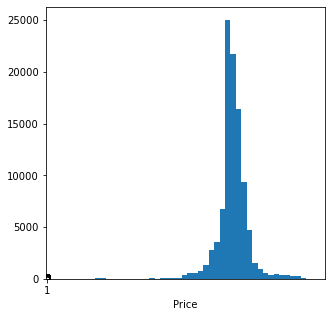

In [8]:
plt.figure(figsize=(5,5))
plt.hist(data_sample['trade_price'], bins=40)
plt.boxplot(data_sample['trade_price'])
plt.xlabel('Price')
plt.show()

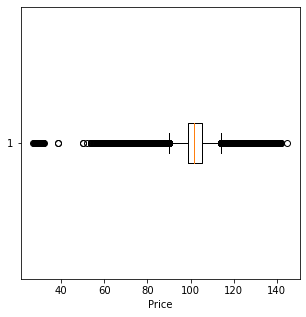

In [9]:
plt.figure(figsize=(5,5))
plt.boxplot(data_sample['trade_price'], vert = False)
plt.xlabel('Price')
plt.show()

The above diagram shows the distribution of trade prices follows a Gaussian distribution which has long tails indicating many outliers.The box plot shows that the median trade price is around $102.

In [10]:
is_callable = data_sample[data_sample['is_callable'] == 1]
is_not_callable = data_sample[data_sample['is_callable'] == 0]

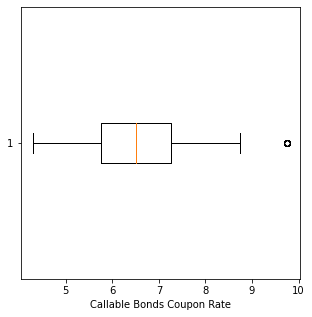

In [11]:
plt.figure(figsize=(5,5))
plt.boxplot(is_callable['current_coupon'], vert = False)
plt.xlabel('Callable Bonds Coupon Rate')
#plt.boxplot(is_not_callable['current_coupon'], vert = False)
plt.show()

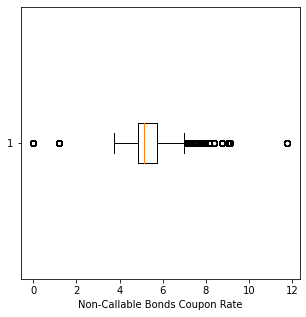

In [12]:
plt.figure(figsize=(5,5))
#plt.boxplot(is_callable['current_coupon'], vert = False)
plt.boxplot(is_not_callable['current_coupon'], vert = False)
plt.xlabel('Non-Callable Bonds Coupon Rate')
plt.show()

Here also we see that the coupons follow Gaussian distribution but with fatter tails.The median coupon of callable bond is significantly higher than not callable bond as expected.

# Feature Engineering

In [13]:
data_sample

Unnamed: 0  bond_id  trade_price  current_coupon  time_to_maturity  \
0           101104     5380     104.3191           6.375          1.072349   
1           101105     5380     104.3191           6.375          1.072349   
2           101106     5380     104.3190           6.375          1.072257   
3           101107     5380     103.9280           6.375          1.072123   
4           101108     5380     103.6930           6.375          1.071774   
...            ...      ...          ...             ...               ...   
100000      201104     8347      99.1500           4.750          3.775962   
100001      201105     8347     101.3120           4.750          3.762565   
100002      201106     8347     102.2500           4.750          3.762313   
100003      201107     8347     105.0200           4.750          3.756416   
100004      201108     8347     104.1610           4.750          3.756416   

        is_callable  reporting_delay  trade_size  trade_type  \
0                 0           38.639       40000           4   
1                 0           38.844       40000           2   
2                 0          117.423        6000           2   
3                 0           30.532       10000           2   
4                 0            2.686       10000           2   
...             ...              ...         ...         ...   
100000            0           12.751       19000           4   
100001            0          269.075       19000           4   
100002            0            8.366       19000           3   
100003            0            5.747       10000           3   
100004            0           19.251       10000           4   

        curve_based_price  ...  received_time_diff_last2  trade_price_last2  \
0              104.202618  ...                       NaN                NaN   
1              104.202618  ...                      28.0         104.359100   
2              104.364239  ...                    2923.0         104.319100   
3              104.431633  ...                    7145.0         104.319100   
4              104.535467  ...                   15213.0         104.319000   
...                   ...  ...                       ...                ...   
100000         101.533815  ...                  601507.0          99.757000   
100001         102.328828  ...                  422488.0          98.992105   
100002         102.431196  ...                  430423.0          99.150000   
100003         103.028539  ...                  193902.0         101.312000   
100004         103.028539  ...                  185980.0         102.250000   

        trade_size_last2  trade_type_last2  curve_based_price_last2  \
0                    NaN               NaN                      NaN   
1                40000.0               4.0               104.202618   
2                40000.0               4.0               104.202618   
3                40000.0               2.0               104.202618   
4                 6000.0               2.0               104.364239   
...                  ...               ...                      ...   
100000           10000.0               4.0               101.264025   
100001           19000.0               2.0               101.533815   
100002           19000.0               4.0               101.533815   
100003           19000.0               4.0               102.328828   
100004           19000.0               3.0               102.431196   

        received_time_diff_last3  trade_price_last3  trade_size_last3  \
0                            NaN                NaN               NaN   
1                            NaN                NaN               NaN   
2                         2951.0         104.359100           40000.0   
3                         7145.0         104.319100           40000.0   
4                        18136.0         104.319100           40000.0   
...                          ...                ...           

In [14]:
data_sample = data_sample.drop(['bond_id'], axis = 1)


In [15]:
data_sample.shape


(100005, 24)

In [16]:
data_sample.isna().sum()


Unnamed: 0                    0
trade_price                   0
current_coupon                0
time_to_maturity              0
is_callable                   0
reporting_delay               0
trade_size                    0
trade_type                    0
curve_based_price             0
received_time_diff_last1      0
trade_price_last1             0
trade_size_last1              0
trade_type_last1              0
curve_based_price_last1       0
received_time_diff_last2    214
trade_price_last2           214
trade_size_last2            214
trade_type_last2            214
curve_based_price_last2     214
received_time_diff_last3    431
trade_price_last3           431
trade_size_last3            431
trade_type_last3            431
curve_based_price_last3     431
dtype: int64

In [17]:
train = data_sample.iloc[:80000,:]


In [18]:
train


Unnamed: 0  trade_price  current_coupon  time_to_maturity  is_callable  \
0          101104     104.3191           6.375          1.072349            0   
1          101105     104.3191           6.375          1.072349            0   
2          101106     104.3190           6.375          1.072257            0   
3          101107     103.9280           6.375          1.072123            0   
4          101108     103.6930           6.375          1.071774            0   
...           ...          ...             ...               ...          ...   
79995      181099     101.6110           4.600          1.554054            0   
79996      181100     101.9930           4.600          1.554054            0   
79997      181101     104.0280           4.600          1.548565            0   
79998      181102     104.4200           4.600          1.548565            0   
79999      181103     103.7420           4.600          1.537515            0   

       reporting_delay  trade_size  trade_type  curve_based_price  \
0               38.639       40000           4         104.202618   
1               38.844       40000           2         104.202618   
2              117.423        6000           2         104.364239   
3               30.532       10000           2         104.431633   
4                2.686       10000           2         104.535467   
...                ...         ...         ...                ...   
79995            2.172        2000           2         104.335698   
79996            1.003        2000           4         104.335698   
79997            2.338       25000           2         104.654496   
79998            0.767       25000           4         104.654496   
79999            5.708       25000           2         104.454583   

       received_time_diff_last1  ...  received_time_diff_last2  \
0                            27  ...                       NaN   
1                             0  ...                      28.0   
2                          2923  ...                    2923.0   
3                          4222  ...                    7145.0   
4                         10991  ...                   15213.0   
...                         ...  ...                       ...   
79995                   2254744  ...                 2254744.0   
79996                         1  ...                 2254746.0   
79997                    173103  ...                  173105.0   
79998                         1  ...                  173104.0   
79999                    348462  ...                  348464.0   

       trade_price_last2  trade_size_last2  trade_type_last2  \
0                    NaN               NaN               NaN   
1               104.3591           40000.0               4.0   
2               104.3191           40000.0               4.0   
3               104.3191           40000.0               2.0   
4               104.3190            6000.0               2.0   
...                  ...               ...               ...   
79995           104.0250           10000.0               4.0   
79996           103.9250           10000.0               2.0   
79997           101.6110            2000.0               2.0   
79998           101.9930            2000.0               4.0   
79999           104.0280           25000.0               2.0   

       curve_based_price_last2  received_time_diff_last3  trade_price_last3  \
0                          NaN                       NaN                NaN   
1                   104.202618                       NaN                NaN   
2                   104.202618                    2951.0           104.3591   
3                   104.202618                    7145.0           104.3191   
4                   104.364239                   18136.0           104.3191   
...                        ...                       ...                ...   
79995               104.256861                 2254744.0           104.0250   
79996      

In [19]:
test = data_sample.iloc[80000:, :]

In [20]:
test

Unnamed: 0  trade_price  current_coupon  time_to_maturity  \
80000       181104      104.242            4.60          1.537515   
80001       181105      105.000            4.60          1.534894   
80002       181106      105.000            4.60          1.534894   
80003       181107      105.100            4.60          1.534894   
80004       181108      105.275            4.60          1.526627   
...            ...          ...             ...               ...   
100000      201104       99.150            4.75          3.775962   
100001      201105      101.312            4.75          3.762565   
100002      201106      102.250            4.75          3.762313   
100003      201107      105.020            4.75          3.756416   
100004      201108      104.161            4.75          3.756416   

        is_callable  reporting_delay  trade_size  trade_type  \
80000             0            5.811       25000           4   
80001             0            7.282       30000           4   
80002             0           13.389       30000           4   
80003             0           13.389       30000           3   
80004             0           55.435       15000           3   
...             ...              ...         ...         ...   
100000            0           12.751       19000           4   
100001            0          269.075       19000           4   
100002            0            8.366       19000           3   
100003            0            5.747       10000           3   
100004            0           19.251       10000           4   

        curve_based_price  received_time_diff_last1  ...  \
80000          104.454583                         0  ...   
80001          104.257857                     82659  ...   
80002          104.257857                         6  ...   
80003          104.257857                         0  ...   
80004          104.470420                    260712  ...   
...                   ...                       ...  ...   
100000         101.533815                         0  ...   
100001         102.328828                    422488  ...   
100002         102.431196                      7935  ...   
100003         103.028539                    185967  ...   
100004         103.028539                        13  ...   

        received_time_diff_last2  trade_price_last2  trade_size_last2  \
80000                   348463.0         104.420000           25000.0   
80001                    82659.0         103.742000           25000.0   
80002                    82665.0         104.242000           25000.0   
80003                        6.0         105.000000           30000.0   
80004                   260712.0         105.000000           30000.0   
...                          ...                ...               ...   
100000                  601507.0          99.757000           10000.0   
100001                  422488.0          98.992105           19000.0   
100002                  430423.0          99.150000           19000.0   
100003                  193902.0         101.312000           19000.0   
100004                  185980.0         102.250000           19000.0   

        trade_type_last2  curve_based_price_last2  received_time_diff_last3  \
80000                4.0               104.654496                  348464.0   
80001                2.0               104.454583                  431122.0   
80002                4.0               104.454583                   82665.0   
80003                4.0               104.257857                   82665.0   
80004                4.0               104.257857                  260718.0   
...                  ...                      ...                       ...   
100000               4.0               101.264025                  601507.0   
100001               2.0               101.533815                 1023995.0   
100002               4.0               101.533815                  430423.0   
100003               4

In [21]:
train.isna().sum()

Unnamed: 0                    0
trade_price                   0
current_coupon                0
time_to_maturity              0
is_callable                   0
reporting_delay               0
trade_size                    0
trade_type                    0
curve_based_price             0
received_time_diff_last1      0
trade_price_last1             0
trade_size_last1              0
trade_type_last1              0
curve_based_price_last1       0
received_time_diff_last2    149
trade_price_last2           149
trade_size_last2            149
trade_type_last2            149
curve_based_price_last2     149
received_time_diff_last3    304
trade_price_last3           304
trade_size_last3            304
trade_type_last3            304
curve_based_price_last3     304
dtype: int64

In [22]:
test.isna().sum()

Unnamed: 0                    0
trade_price                   0
current_coupon                0
time_to_maturity              0
is_callable                   0
reporting_delay               0
trade_size                    0
trade_type                    0
curve_based_price             0
received_time_diff_last1      0
trade_price_last1             0
trade_size_last1              0
trade_type_last1              0
curve_based_price_last1       0
received_time_diff_last2     65
trade_price_last2            65
trade_size_last2             65
trade_type_last2             65
curve_based_price_last2      65
received_time_diff_last3    127
trade_price_last3           127
trade_size_last3            127
trade_type_last3            127
curve_based_price_last3     127
dtype: int64

# Input & Target Columns
Let's select the columns that we'll use for training.

In [23]:
train.columns

Index(['Unnamed: 0', 'trade_price', 'current_coupon', 'time_to_maturity',
       'is_callable', 'reporting_delay', 'trade_size', 'trade_type',
       'curve_based_price', 'received_time_diff_last1', 'trade_price_last1',
       'trade_size_last1', 'trade_type_last1', 'curve_based_price_last1',
       'received_time_diff_last2', 'trade_price_last2', 'trade_size_last2',
       'trade_type_last2', 'curve_based_price_last2',
       'received_time_diff_last3', 'trade_price_last3', 'trade_size_last3',
       'trade_type_last3', 'curve_based_price_last3'],
      dtype='object')

In [24]:
inputs_cols = ['current_coupon',
       'time_to_maturity', 'is_callable', 'reporting_delay', 'trade_size',
       'trade_type', 'curve_based_price', 'received_time_diff_last1',
       'trade_price_last1', 'trade_size_last1', 'trade_type_last1',
       'curve_based_price_last1', 'received_time_diff_last2',
       'trade_price_last2', 'trade_size_last2', 'trade_type_last2',
       'curve_based_price_last2', 'received_time_diff_last3',
       'trade_price_last3', 'trade_size_last3', 'trade_type_last3',
       'curve_based_price_last3']
target_col = ['trade_price']



In [25]:
train_inputs = train[inputs_cols]
train_target = train[target_col]
test_inputs = test[inputs_cols]
test_output = test[target_col]

In [26]:
X_train = train[inputs_cols]
y_train = train[target_col]
X_test = test[inputs_cols]
y_test = test[target_col]

In [27]:
X_train.isna().sum()

current_coupon                0
time_to_maturity              0
is_callable                   0
reporting_delay               0
trade_size                    0
trade_type                    0
curve_based_price             0
received_time_diff_last1      0
trade_price_last1             0
trade_size_last1              0
trade_type_last1              0
curve_based_price_last1       0
received_time_diff_last2    149
trade_price_last2           149
trade_size_last2            149
trade_type_last2            149
curve_based_price_last2     149
received_time_diff_last3    304
trade_price_last3           304
trade_size_last3            304
trade_type_last3            304
curve_based_price_last3     304
dtype: int64

In [28]:

from statsmodels.stats.outliers_influence import variance_inflation_factor


In [29]:
# Converting the 2d numpy arrays to 1d so that sklearn can compute it.
y_train = y_train.values.flatten()


In [30]:
y_train


array([104.3191, 104.3191, 104.319 , ..., 104.028 , 104.42  , 103.742 ])

# Identify Numeric & Categorical Columns.

In [31]:
numeric_cols = ['current_coupon',
       'time_to_maturity', 'reporting_delay', 'trade_size',
       'curve_based_price', 'received_time_diff_last1',
       'trade_price_last1', 'trade_size_last1',
       'curve_based_price_last1', 'received_time_diff_last2',
       'trade_price_last2', 'trade_size_last2',
       'curve_based_price_last2', 'received_time_diff_last3',
       'trade_price_last3', 'trade_size_last3',
       'curve_based_price_last3']

categorical_cols = ['is_callable', 'trade_type', 'trade_type_last1', 'trade_type_last2', 'trade_type_last3']
print(len(numeric_cols) + len(categorical_cols))


22


In [32]:

from statsmodels.tools.tools import add_constant



# Impute Missing Numerical Data

In [33]:
X_train[numeric_cols].isna().sum()


current_coupon                0
time_to_maturity              0
reporting_delay               0
trade_size                    0
curve_based_price             0
received_time_diff_last1      0
trade_price_last1             0
trade_size_last1              0
curve_based_price_last1       0
received_time_diff_last2    149
trade_price_last2           149
trade_size_last2            149
curve_based_price_last2     149
received_time_diff_last3    304
trade_price_last3           304
trade_size_last3            304
curve_based_price_last3     304
dtype: int64

In [34]:
X_test[numeric_cols].isna().sum()



current_coupon                0
time_to_maturity              0
reporting_delay               0
trade_size                    0
curve_based_price             0
received_time_diff_last1      0
trade_price_last1             0
trade_size_last1              0
curve_based_price_last1       0
received_time_diff_last2     65
trade_price_last2            65
trade_size_last2             65
curve_based_price_last2      65
received_time_diff_last3    127
trade_price_last3           127
trade_size_last3            127
curve_based_price_last3     127
dtype: int64

In [35]:
from sklearn.impute import SimpleImputer


In [36]:
imputer = SimpleImputer(strategy = 'mean').fit(train_data[numeric_cols])


In [37]:
X_train[numeric_cols] = imputer.transform(X_train[numeric_cols])
X_test[numeric_cols] = imputer.transform(X_test[numeric_cols])


/Users/abhishekakula/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/Users/abhishekakula/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [38]:
X_train[numeric_cols].isna().sum()



current_coupon              0
time_to_maturity            0
reporting_delay             0
trade_size                  0
curve_based_price           0
received_time_diff_last1    0
trade_price_last1           0
trade_size_last1            0
curve_based_price_last1     0
received_time_diff_last2    0
trade_price_last2           0
trade_size_last2            0
curve_based_price_last2     0
received_time_diff_last3    0
trade_price_last3           0
trade_size_last3            0
curve_based_price_last3     0
dtype: int64

In [39]:
X_test[numeric_cols].isna().sum()



current_coupon              0
time_to_maturity            0
reporting_delay             0
trade_size                  0
curve_based_price           0
received_time_diff_last1    0
trade_price_last1           0
trade_size_last1            0
curve_based_price_last1     0
received_time_diff_last2    0
trade_price_last2           0
trade_size_last2            0
curve_based_price_last2     0
received_time_diff_last3    0
trade_price_last3           0
trade_size_last3            0
curve_based_price_last3     0
dtype: int64

In [40]:
train_inputs1 = X_train[numeric_cols]
train_inputs1.head()

current_coupon  time_to_maturity  reporting_delay  trade_size  \
0           6.375          1.072349           38.639     40000.0   
1           6.375          1.072349           38.844     40000.0   
2           6.375          1.072257          117.423      6000.0   
3           6.375          1.072123           30.532     10000.0   
4           6.375          1.071774            2.686     10000.0   

   curve_based_price  received_time_diff_last1  trade_price_last1  \
0         104.202618                      27.0           104.3591   
1         104.202618                       0.0           104.3191   
2         104.364239                    2923.0           104.3191   
3         104.431633                    4222.0           104.3190   
4         104.535467                   10991.0           103.9280   

   trade_size_last1  curve_based_price_last1  received_time_diff_last2  \
0           40000.0               104.202618              60719.763476   
1           40000.0               104.202618                 28.000000   
2           40000.0               104.202618               2923.000000   
3            6000.0               104.364239               7145.000000   
4           10000.0               104.431633              15213.000000   

   trade_price_last2  trade_size_last2  curve_based_price_last2  \
0         101.863326     132745.337024               101.725993   
1         104.359100      40000.000000               104.202618   
2         104.319100      40000.000000               104.202618   
3         104.319100      40000.000000               104.202618   
4         104.319000       6000.000000               104.364239   

   received_time_diff_last3  trade_price_last3  trade_size_last3  \
0               89340.30042         101.857961      132181.86391   
1               89340.30042         101.857961      132181.86391   
2                2951.00000         104.359100       40000.00000   
3                7145.00000         104.319100       40000.00000   
4               18136.00000         104.319100       40000.00000   

   curve_based_price_last3  
0               101.720516  
1               101.720516  
2               104.202618  
3               104.202618  
4               104.202618

In [41]:
import warnings
warnings.filterwarnings('ignore')

In [42]:
X = add_constant(train_inputs1)
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

const                        185.960175
current_coupon                 1.121832
time_to_maturity               1.132437
reporting_delay                1.000111
trade_size                     1.179734
curve_based_price            924.646508
received_time_diff_last1       2.153218
trade_price_last1             69.881748
trade_size_last1               1.300797
curve_based_price_last1     1092.822692
received_time_diff_last2       4.373137
trade_price_last2             83.608524
trade_size_last2               1.298604
curve_based_price_last2      441.923218
received_time_diff_last3       3.226058
trade_price_last3             69.356825
trade_size_last3               1.176320
curve_based_price_last3      249.988549
dtype: float64

#Scaling Numeric Features

In [43]:
from sklearn.preprocessing import MinMaxScaler



In [44]:
scaler = MinMaxScaler().fit(X_train[numeric_cols])



In [45]:
X_train[numeric_cols] = scaler.transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


# Encoding Categorical Data

In [46]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(train_data[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))
X_train[encoded_cols] = encoder.transform(X_train[categorical_cols])
X_test[encoded_cols] = encoder.transform(X_test[categorical_cols])
X_test

current_coupon  time_to_maturity  is_callable  reporting_delay  \
80000         0.391489          0.015186            0     5.180258e-07   
80001         0.391489          0.015155            0     5.327536e-07   
80002         0.391489          0.015155            0     5.938975e-07   
80003         0.391489          0.015155            0     5.938975e-07   
80004         0.391489          0.015056            0     1.014866e-06   
...                ...               ...          ...              ...   
100000        0.404255          0.041867            0     5.875098e-07   
100001        0.404255          0.041707            0     3.153850e-06   
100002        0.404255          0.041704            0     5.436067e-07   
100003        0.404255          0.041634            0     5.173851e-07   
100004        0.404255          0.041634            0     6.525884e-07   

        trade_size  trade_type  curve_based_price  received_time_diff_last1  \
80000     0.004801           4           0.651455              0.000000e+00   
80001     0.005801           4           0.649765              9.869512e-03   
80002     0.005801           4           0.649765              7.164020e-07   
80003     0.005801           3           0.649765              0.000000e+00   
80004     0.002801           3           0.651591              3.112910e-02   
...            ...         ...                ...                       ...   
100000    0.003601           4           0.626364              0.000000e+00   
100001    0.003601           4           0.633194              5.044521e-02   
100002    0.003601           3           0.634073              9.474416e-04   
100003    0.001800           3           0.639204              2.220452e-02   
100004    0.001800           4           0.639204              1.552204e-06   

        trade_price_last1  trade_size_last1  ...  trade_type_last1_3  \
80000            0.651969          0.004801  ...                 0.0   
80001            0.656217          0.004801  ...                 0.0   
80002            0.662657          0.005801  ...                 0.0   
80003            0.662657          0.005801  ...                 0.0   
80004            0.663506          0.005801  ...                 1.0   
...                   ...               ...  ...                 ...   
100000           0.611616          0.003601  ...                 0.0   
100001           0.612957          0.003601  ...                 0.0   
100002           0.631325          0.003601  ...                 0.0   
100003           0.639294          0.003601  ...                 1.0   
100004           0.662827          0.001800  ...                 1.0   

        trade_type_last1_4  trade_type_last2_2.0  trade_type_last2_3.0  \
80000                  0.0                   0.0                   0.0   
80001                  1.0                   1.0                   0.0   
80002                  1.0                   0.0                   0.0   
80003                  1.0                   0.0                   0.0   
80004                  0.0                   0.0                   0.0   
...                    ...                   ...                   ...   
100000                 0.0                   0.0                   0.0   
100001                 1.0                   1.0                   0.0   
100002                 1.0                   0.0                   0.0   
100003                 0.0                   0.0                   0.0   
100004                 0.0                   0.0                   1.0   

        trade_type_last2_4.0  trade_type_last2_nan  trade_type_last3_2.0  \
80000                    1.0                   0.0                   1.0   
80001                    0.0                   0.0                   0.0   
80002                    1.0                   0.0                   1.0   
80003                    1.0                   0.0                   0.0   
80004                    1.0        

In [47]:
X_train = X_train[numeric_cols + encoded_cols]
X_test = X_test[numeric_cols + encoded_cols]
X_test

current_coupon  time_to_maturity  reporting_delay  trade_size  \
80000         0.391489          0.015186     5.180258e-07    0.004801   
80001         0.391489          0.015155     5.327536e-07    0.005801   
80002         0.391489          0.015155     5.938975e-07    0.005801   
80003         0.391489          0.015155     5.938975e-07    0.005801   
80004         0.391489          0.015056     1.014866e-06    0.002801   
...                ...               ...              ...         ...   
100000        0.404255          0.041867     5.875098e-07    0.003601   
100001        0.404255          0.041707     3.153850e-06    0.003601   
100002        0.404255          0.041704     5.436067e-07    0.003601   
100003        0.404255          0.041634     5.173851e-07    0.001800   
100004        0.404255          0.041634     6.525884e-07    0.001800   

        curve_based_price  received_time_diff_last1  trade_price_last1  \
80000            0.651455              0.000000e+00           0.651969   
80001            0.649765              9.869512e-03           0.656217   
80002            0.649765              7.164020e-07           0.662657   
80003            0.649765              0.000000e+00           0.662657   
80004            0.651591              3.112910e-02           0.663506   
...                   ...                       ...                ...   
100000           0.626364              0.000000e+00           0.611616   
100001           0.633194              5.044521e-02           0.612957   
100002           0.634073              9.474416e-04           0.631325   
100003           0.639204              2.220452e-02           0.639294   
100004           0.639204              1.552204e-06           0.662827   

        trade_size_last1  curve_based_price_last1  received_time_diff_last2  \
80000           0.004801                 0.651455              4.159929e-02   
80001           0.004801                 0.651455              9.867779e-03   
80002           0.005801                 0.649765              9.868495e-03   
80003           0.005801                 0.649765              7.162762e-07   
80004           0.005801                 0.649765              3.112363e-02   
...                  ...                      ...                       ...   
100000          0.003601                 0.626364              7.180752e-02   
100001          0.003601                 0.626364              5.043635e-02   
100002          0.003601                 0.633194              5.138362e-02   
100003          0.003601                 0.634073              2.314790e-02   
100004          0.001800                 0.639204              2.220217e-02   

        ...  trade_type_last1_3  trade_type_last1_4  trade_type_last2_2.0  \
80000   ...                 0.0                 0.0                   0.0   
80001   ...                 0.0                 1.0                   1.0   
80002   ...                 0.0                 1.0                   0.0   
80003   ...                 0.0                 1.0                   0.0   
80004   ...                 1.0                 0.0                   0.0   
...     ...                 ...                 ...                   ...   
100000  ...                 0.0                 0.0                   0.0   
100001  ...                 0.0                 1.0                   1.0   
100002  ...                 0.0                 1.0                   0.0   
100003  ...                 1.0                 0.0                   0.0   
100004  ...                 1.0                 0.0                   0.0   

        trade_type_last2_3.0  trade_type_last2_4.0  trade_type_last2_nan  \
80000                    0.0                   1.0                   0.0   
80001                    0.0                   0.0                   0.0   
80002                    0.0                   1.0                   0.0   
80003                    0.0                   1.0              

# 1st Model: Train A Ridge Regression Model

In [48]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train, y_train)

Ridge()

In [49]:
from sklearn.metrics import mean_squared_error
train_preds = model.predict(X_test)
train_preds

rmse = np.sqrt(mean_squared_error(y_test,train_preds))
print('The RMSE loss is {}.'.format(rmse))

The RMSE loss is 0.8347713466362221.


In [50]:
test_preds = model.predict(X_test)
test_preds

array([104.29597846, 104.3341197 , 104.62045772, ..., 101.82109227,
       102.37259306, 103.25961447])

# Using Random Forest Regression

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
rf1 = RandomForestRegressor(n_jobs=-1, random_state=42)

In [54]:
rf1.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [55]:
rf1_train_preds = rf1.predict(X_train)

In [56]:
rf1_train_rmse = np.sqrt(mean_squared_error(y_train, rf1_train_preds))

In [57]:
rf1_val_preds = rf1.predict(X_test)

In [58]:
rf1_val_rmse = np.sqrt(mean_squared_error(test[target_col], rf1_val_preds))

In [59]:
print('Train RMSE: $ {}, Validation RMSE: $ {}'.format(rf1_train_rmse, rf1_val_rmse))

Train RMSE: $ 0.3017586122984349, Validation RMSE: $ 0.786742296895183


In [60]:
rf1_test_preds = rf1.predict(X_test)
rf1_test_preds

array([104.121891  , 104.12976648, 104.509755  , ..., 103.751214  ,
       103.61130326, 103.8128957 ])